# Building an Ibor Single Curve

Constructing an Ibor Single Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

## Creating the Libor Instruments

In [3]:
value_dt = Date(18, 9, 2019)

### Load up the deposits first

In [4]:
depo_dcc_type = DayCountTypes.THIRTY_E_360_ISDA
depos = []

spot_days = 2
settle_dt = value_dt.add_weekdays(spot_days)

deposit_rate = 0.050
maturity_dt = settle_dt.add_months(1)
depo = IborDeposit(settle_dt, maturity_dt, deposit_rate, depo_dcc_type)
depos.append(depo)

maturity_dt = settle_dt.add_months(3)
depo = IborDeposit(settle_dt, maturity_dt, deposit_rate, depo_dcc_type)
depos.append(depo)

maturity_dt = settle_dt.add_months(6)
depo = IborDeposit(settle_dt, maturity_dt, deposit_rate, depo_dcc_type)
depos.append(depo)

maturity_dt = settle_dt.add_months(9)
depo = IborDeposit(settle_dt, maturity_dt, deposit_rate, depo_dcc_type)
depos.append(depo)

maturity_dt = settle_dt.add_months(12)
depo = IborDeposit(settle_dt, maturity_dt, deposit_rate, depo_dcc_type)
depos.append(depo)

### Then we load up the FRAs

In [5]:
# 1 x 4 FRA
pay_fixed = True
notional = 1000
fras = []

fra_rate = 0.05
fraSettlementDate = settle_dt.add_months(12)
fraMaturityDate = settle_dt.add_months(16)
fra = IborFRA(fraSettlementDate, fraMaturityDate, fra_rate, depo_dcc_type)
fras.append(fra)

# 4 x 7 FRA
fra_rate = 0.08
fraSettlementDate = settle_dt.add_months(16)
fraMaturityDate = settle_dt.add_months(20)
fra = IborFRA(fraSettlementDate, fraMaturityDate, fra_rate, depo_dcc_type)
fras.append(fra)

### Then we load up swap rates

In [6]:
swaps = []
fixed_dcc_type = DayCountTypes.ACT_365F
fixed_freq_type = FrequencyTypes.SEMI_ANNUAL
swap_type = SwapTypes.PAY

swap_rate = 0.050
maturity_dt = settle_dt.add_months(24)
swap = IborSwap(settle_dt, maturity_dt, swap_type, swap_rate, fixed_freq_type, fixed_dcc_type)
swaps.append(swap)

swap_rate = 0.052
maturity_dt = settle_dt.add_months(36)
swap = IborSwap(settle_dt, maturity_dt, swap_type, swap_rate, fixed_freq_type, fixed_dcc_type)
swaps.append(swap)

swap_rate = 0.0535
maturity_dt = settle_dt.add_months(48)
swap = IborSwap(settle_dt, maturity_dt, swap_type, swap_rate, fixed_freq_type, fixed_dcc_type)
swaps.append(swap)

swap_rate = 0.055
maturity_dt = settle_dt.add_months(60)
swap = IborSwap(settle_dt, maturity_dt, swap_type, swap_rate, fixed_freq_type, fixed_dcc_type)
swaps.append(swap)

swap_rate = 0.0565
maturity_dt = settle_dt.add_months(84)
swap = IborSwap(settle_dt, maturity_dt, swap_type, swap_rate, fixed_freq_type, fixed_dcc_type)
swaps.append(swap)

swap_rate = 0.057
maturity_dt = settle_dt.add_months(120)
swap = IborSwap(settle_dt, maturity_dt, swap_type, swap_rate, fixed_freq_type, fixed_dcc_type)
swaps.append(swap)

In [7]:
libor_curve = IborSingleCurve(value_dt, depos, fras, swaps)

## Check Repricing

In [8]:
for depo in depos:
    v = depo.value(settle_dt, libor_curve)
    print("Depo Value: %10.6f"% v)

Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.002910
Depo Value: 100.006230
Depo Value: 100.009386


In [9]:
for fra in fras:
    v = fra.value(settle_dt, libor_curve)
    print("FRA Value: %10.6f"% v)

FRA Value:   0.012836
FRA Value:   0.000000


In [10]:
for swap in swaps:
    v = swap.value(settle_dt, libor_curve)
    print("Swap Value: %12.8f" % v)

Swap Value:  -0.00000616
Swap Value:  -0.00000000
Swap Value:  -0.00000000
Swap Value:  -0.00000000
Swap Value:  -0.00000019
Swap Value:  -0.00000509


## Curve Examination

Generate a vector of time points and then generate zero rates and forward rates

In [11]:
years = np.linspace(0.01,10,500)
dates = settle_dt.add_years(years)
zero_rates = libor_curve.zero_rate(dates)
fwd_rates = libor_curve.fwd(dates)

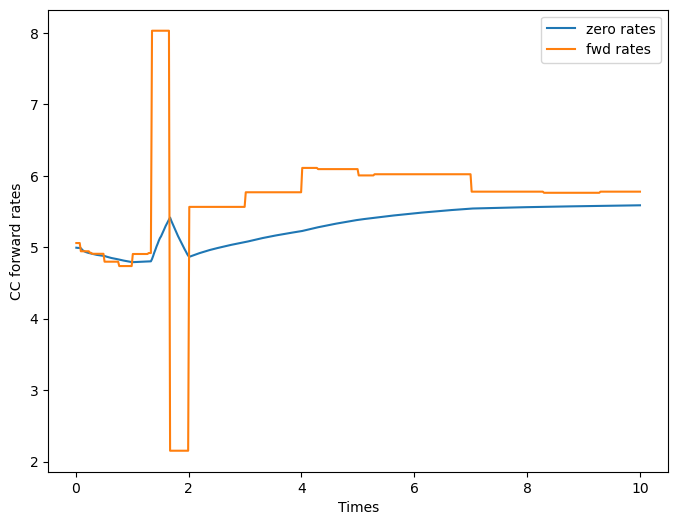

In [12]:
plt.figure(figsize=(8,6))
plt.plot(years, zero_rates*100, label="zero rates")
plt.plot(years, fwd_rates*100, label = "fwd rates")
plt.xlabel("Times")
plt.ylabel("CC forward rates")
plt.legend();

We see that the forward rates are piecewise flat